First, type your name in the code cell below and run the cell.



In [ ]:
# @title Full Name { run: "auto" }
Name = 'Victoria Omari' # @param {type:"string", placeholder:"Enter Full Name"}
print("Name:", Name)

Name: Victoria Omari


# Assignment 3

## Directions

In this assignment, you will perform Logistic Regression and Naive Bayes classification analysis and compare model performance.

Include your code and any required written responses immediately under the relevant question prompt in the space provided.

You will include your answers in this .ipynb template notebook in the space provided under the numbered questions below. Under the numbered questions there is either a code cell or text cell provided for your response.

There are 3 deliverables for this assignment:

> 1.   ***The link to your Google Colab notebook file***: Submit the link to your notebook file. To do so, click **Share** on the top right-hand side. Then a box will pop-up. You need to change **"restricted"** to **"anyone with the link."** Then, copy the link and paste it as a comment when submitting the assignment on Canvas.
> 2.   ***The IPYNB notebook file***: Download the same file as ipynb. To do so, Go to **File**, select **Download**. Then Click on **ipynb** on the menu box.
> 3.   ***The PDF version of your notebook file***: Download the same file as pdf. To do so, Go to **File**, select **Print**,A menu box will pop up. Then Click on **PDF** on the menu box. This will convert the file into a PDF file, instead of printing it using a printer.

All written responses must be in your own words. If using AI in any capacity to aid with written responses to assignment question prompts,  there is 1 additional required deliverable for the assignment.
> 1.   ***A PDF of all AI prompts and responses used***: Submit this information aggregated as a PDF.

If this is not included and responses appear to be AI generated you will receive a 0 for the assignment. If this is included and your written responses are plagiarized, you will receive a 0 for the assignment.

Rename this template file - <b>LastnameFirstname_A#.ipynb</b>, where # is the assignment number. As an example, my Assignment #1 would be named **HillChelsey_A1.ipynb**. Your .pdf file should follow the same file naming format (for example, my Assignment #1 .pdf file would be named **HillChelsey_A1.pdf**).

**Note**: Points will be deducted for extraneous code in the submissions, inefficient code, incorrect file naming, and if your answers are not in the space provided for answers.









## Business Case

You work in analytics for the Ritz Carlton Hotel Company, a multinational corporation operating luxury chain hotels. The hotel chain is known for offering luxury services, including food and beverage. You have been tasked with automating the process of wine selection for the hotels by the Head Corporate Sommelier. You will use the **[whitewine-classification.csv](https://github.com/CHill-MSU/INFO583/blob/main/whitewine-classification.csv)** data in your analysis, which includes characteristics of the wines.


<hr>

## Prerequisite Code

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

## Questions

>  0. **(a) First, use the 'whitewine-classification.csv' file to create a dataframe named data. Then, view the first 5 observations in the `data` dataframe.**

In [ ]:
data = pd.read_csv('whitewine-classification.csv') #read csv file
data.head() #data obeservation

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,goodwine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


>  0. **(b) View the dataframe information to evaluate variable types and missingness.**

In [ ]:
data.info() #data overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  goodwine              4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
target = 'goodwine'

nums = ['fixed_acidity','volatile_acidity', 'citric_acid',
'chlorides', 'free_sulphur_dioxide', 'total_sulfur_dioxide', 'density''residual_sugar', 'alcohol', 'pH', 'sulphates']

# identify numerical variables dynamically
nums = list(data.columns.difference([target]))

# convert categorical predictors and target to categories
data[nums+ [target]] = data[nums + [target]].astype('category')

print('Target:',target)
print('Predictors')
print('Numerical:',nums)

Target: goodwine
Predictors
Numerical: ['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity', 'free_sulfur_dioxide', 'pH', 'residual_sugar', 'sulphates', 'total_sulfur_dioxide', 'volatile_acidity']


In [ ]:
data[nums].describe()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
count,4898.0,4898.000,4898.0,4898.000,4898.0,4898.0,4898.00,4898.0,4898.0,4898.0,4898.00
unique,103.0,160.000,87.0,890.000,68.0,132.0,103.00,310.0,79.0,251.0,125.00
top,9.4,0.044,0.3,0.992,6.8,29.0,3.14,1.2,0.5,111.0,0.28
freq,229.0,201.000,307.0,64.000,308.0,160.0,172.00,187.0,249.0,69.0,263.00


>  0. **(c) (0) Use a heatmap to evaluate if there are missing values in the `data` dataframe.**

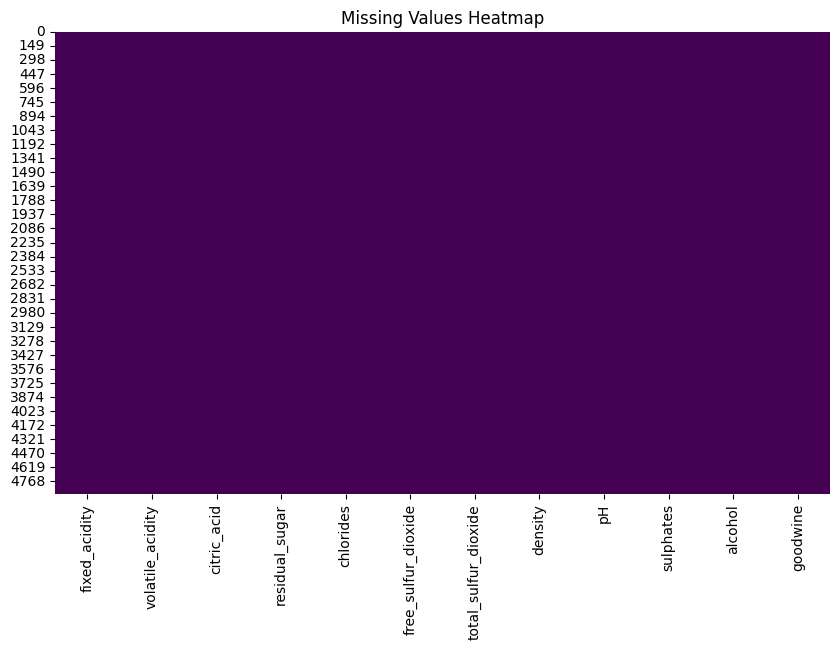

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()



---



>  1. **(a) (5) In your classification analysis you will use all other variables as predictors to predict `goodwine`, which takes on values of `1` if the wine is top quality and `0`, otherwise. Visualize the distribution of the target variable.**

<Axes: xlabel='goodwine'>

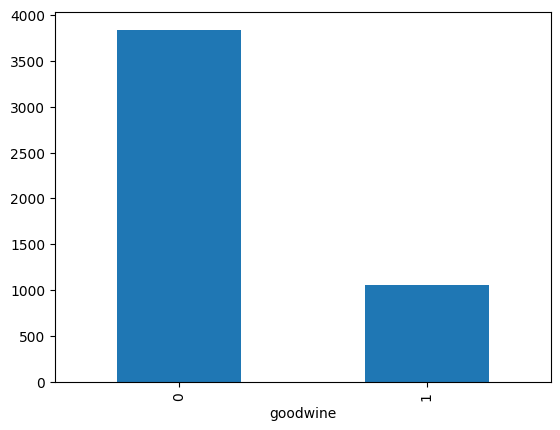

In [ ]:
data[target].value_counts().plot(kind= 'bar') #visualize target variable

>  1. **(b) (5) Based on your output in Question 1a, do you think class imbalance is present? Why or why not? Explain.**

Based on my output there is a data imbalance. Out of all the wines, 3,838 are labeled as not top quality (0) and only 1,060 are labeled as top quality (1). That means for every 4 not top quality wines, there’s only about 1 top quality wine. Because of this imbalance, a model might just keep predicting  not top quality most of the time.



---



>  2. **(a) (5) Next, you will identify your predictor and target variables. Create `X`, which contains all predictor variables. Create `y`, which contains the target variable.**

In [ ]:
y = data[target] # isolate target variable
X = data[nums] # select predictor variable

>  2. **(b) (5) Create the train and test sets from the `X` and `y` objects using a 75/25 train/test split and a random state of 123.**

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
test_size= 0.25, #75/25
random_state=123)



---



>  3. **(a) (10) Fit the Logistic Regression model using sklearn. If you identified class imbalance in Question 1b, include the argument `class_weight = 'balanced'`. Use the liblinear solver and initialize a random state of 123. Then, obtain predctions.**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# Define numeric transformer pipeline
numeric_trans = Pipeline(
steps=[
("imputer_nums", SimpleImputer(strategy="median"))
]
)

# variable transfromers
pp = ColumnTransformer(
transformers=[
("numeric", numeric_trans, nums)
],
verbose_feature_names_out=False
)

# Define training pipeline
pipe = Pipeline(steps=[
("preprocess", pp),
("logreg", LogisticRegression(
class_weight='balanced',
solver='liblinear',
random_state=123
))
])

# Fit the model
pipe.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer_nums',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['alcohol', 'chlorides',
                                                   'citric_acid', 'density',
                                                   'fixed_acidity',
                                                   'free_sulfur_dioxide', 'pH',
                                                   'residual_sugar',
                                                   'sulphates',
                                                   'total_sulfur_dioxide',
                                                   'volatile_acidity'])],
                                   verbose_feature_names_out=False)),
                ('logreg',
                 LogisticRegression(class_weight='balanced', random_state=123,
                                    solver='liblinear'))])

In [ ]:
import numpy as np # import numpy

pd.DataFrame({
'variable': pp.get_feature_names_out(), # get feature names from ColumnTransformer
'coefficient (log odds)': np.transpose(pipe.named_steps['logreg'].coef_.flatten()), # model coefficients
'coefficient (odds)': np.transpose(np.exp(pipe.named_steps['logreg'].coef_.flatten()))
})

,variable,coefficient (log odds),coefficient (odds)
0,alcohol,0.857559,2.357400
1,chlorides,-1.833167,0.159906
2,citric_acid,-1.013210,0.363052
3,density,-4.031772,0.017743
4,fixed_acidity,-0.063767,0.938224
5,free_sulfur_dioxide,0.009626,1.009673
6,pH,0.019214,1.019400
7,residual_sugar,0.058124,1.059847
8,sulphates,1.298422,3.663512
9,total_sulfur_dioxide,-0.004745,0.995266


>  3. **(b) (15) Next, you will fit 2 Naive Bayes models using sklearn. Then, obtain predictions for both models. Below is a description of the models:**
 * Model 1: Multinomial Bayes.
 * Model 2: If you identified class imbalance in Question 1b, use Complement Naive Bayes (`ComplementNB()`). Otherwise, use Gaussian Naive Bayes (`GaussianNB()`).

For more information, view the documentation:

* [ComplementNB](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.ComplementNB.html)

* [GaussianNB](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.GaussianNB.html)


In [ ]:
from collections import Counter

# Prepare data
y = data[target]
X = data[nums]
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.25, random_state=123
)

# Preprocessing pipeline
numeric_trans = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])
pp = ColumnTransformer([
    ("numeric", numeric_trans, nums)
], verbose_feature_names_out=False)

# Model 1: MultinomialNB
pipe_mnb = Pipeline([
    ("preprocess", pp),
    ("MNB", MultinomialNB())
])
pipe_mnb.fit(train_X, train_y)
y_pred_mnb = pipe_mnb.predict(test_X)
y_proba_mnb = pipe_mnb.predict_proba(test_X)[:, 1]

# Model 2: ComplementNB if imbalance, else GaussianNB ---
class_counts = Counter(train_y)
imbalance_ratio = min(class_counts.values()) / max(class_counts.values())
if imbalance_ratio < 0.5:
    pipe_model2 = Pipeline([
        ("preprocess", pp),
        ("CNB", ComplementNB())
    ])
    print("Using ComplementNB due to class imbalance")
else:
    pipe_model2 = Pipeline([
        ("preprocess", pp),
        ("GNB", GaussianNB())
    ])
    print("Using GaussianNB (no significant imbalance)")
pipe_model2.fit(train_X, train_y)
y_pred_model2 = pipe_model2.predict(test_X)
y_proba_model2 = pipe_model2.predict_proba(test_X)[:, 1]

# Display first 10 predictions
print("MultinomialNB preds:", y_pred_mnb[:10])
print(f"{pipe_model2.named_steps[list(pipe_model2.named_steps.keys())[-1]].__class__.__name__} preds:", y_pred_model2[:10])

Using ComplementNB due to class imbalance
MultinomialNB preds: [0 0 1 1 0 0 0 0 0 0]
ComplementNB preds: [0 1 1 1 0 0 0 0 0 0]


>  3. **(c) (15) In the class example [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) was used. In viewing the documentation for [ComplementNB](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.ComplementNB.html) and [GaussianNB](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.GaussianNB.html), why might these models be a better fit to the data? Explain.**

GaussianNB fits better since it assumes the data follows a normal curve, and ComplementNB helps with the class imbalance making them both better choices than MultinomialNB.



---

<br>

> 4. **(a) (15) Next, output the classification report for each of the 3 classification models you trained. Be sure that the output is labeled by model.**

In [ ]:
# Logistic Regression
y_pred_log = pipe.predict(test_X) # get predictions from your logistic regression pipeline
print("=== Logistic Regression ===")
print(classification_report(test_y, y_pred_log, zero_division=0))

# Multinomial Naive Bayes
print("=== Multinomial Naive Bayes ===")
print(classification_report(test_y, y_pred_mnb, zero_division=0))

# ComplementNB or GaussianNB ---
print(f"=== {pipe_model2.named_steps[list(pipe_model2.named_steps.keys())[-1]].__class__.__name__} ===")
print(classification_report(test_y, y_pred_model2, zero_division=0))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.92      0.67      0.78       978
           1       0.37      0.77      0.50       247

    accuracy                           0.69      1225
   macro avg       0.65      0.72      0.64      1225
weighted avg       0.81      0.69      0.72      1225

=== Multinomial Naive Bayes ===
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       978
           1       0.37      0.36      0.37       247

    accuracy                           0.75      1225
   macro avg       0.61      0.60      0.60      1225
weighted avg       0.75      0.75      0.75      1225

=== ComplementNB ===
              precision    recall  f1-score   support

           0       0.89      0.60      0.72       978
           1       0.31      0.71      0.43       247

    accuracy                           0.62      1225
   macro avg       0.60      0.65      0.57    

> 4. **(b) (10) The Sommelier is most interested in being able to correctly predict high quality wines. Based on this, which of the 3 classification models would you recommend? Explain.**

I recommend Complement Naive Bayes (ComplementNB) because it is more effective at correctly identifying high quality wines, which is the Sommelier’s main priority. Unlike the other models, ComplementNB directly addresses class imbalance and provides higher recall for the minority class.

> 4. **(c) (10) Quality is very important for the company. It would be highly embarrassing to distribute a wine to hotel guests that was predicted to be high quality, but was actually low quality. With this in mind, would your recommended model change? Why or why not? Explain.**

To avoid the embarrassment of serving low-quality wine labeled as high-quality, I would slightly adjust the model. The current models have a precision of around 31%–37%, which is relatively low. Logistic Regression or ComplementNB could be fine tuned to make fewer incorrect high quality predictions while still identifying a good number of actual high quality wines.

> 4. **(d) (10) Finally, based on your output in Question 4a and considering the information provided in Question 4b and your response, is this a good model for the Ritz Carlton Hotel Company to use to predict if a wine is high quality? Why or why not? Explain.**

Based on the output, I would not recommend that the Ritz Carlton Hotel use this model. The precision is low, meaning it often predicts wines as high quality when they are actually low quality. For this reason, I would advise against using the model since the hotel cannot risk serving a low quality wine that was incorrectly labeled as high quality.


<hr>